In [75]:
%matplotlib inline
%load_ext autoreload
%autoreload 2

# from __future__ import absolute_import
import sys
sys.path.append("../")

import os

import numpy as np
import pandas as pd

from random import choice

from sklearn.ensemble import RandomForestRegressor as RF
from sklearn.grid_search import RandomizedSearchCV as RS
from sklearn.pipeline import Pipeline
from sklearn.metrics import mean_squared_error

from scipy.stats import randint as sp_randint

from matplotlib import pylab as plt
import seaborn as sns

from utils.evaluation_utils import rmsle
from utils.generic_utils import pickle_out,pickle_in
from utils.preprocessing_utils import preprocess_datetime,generate_timelag_data,generate_mean_timelag_data,\
generate_min_timelag_data,generate_max_timelag_data,lagged_day_night_mean,lagged_day_night_median,\
lagged_day_night_min,lagged_day_night_max,lagged_day_night_span,lagged_day_night_quantile_25,\
lagged_day_night_quantile_75,lagged_day_night_quantile_variation,generate_median_timelag_data,\
preprocess_rolling_edge

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [76]:
data_folder = os.path.join("../","datasets","initial_data_split")

train = pd.read_csv(os.path.join(data_folder,"train.csv"))
valid = pd.read_csv(os.path.join(data_folder,"valid.csv"))

X_train,Y_train = preprocess_datetime(train,mode="train")
X_valid,Y_valid = preprocess_datetime(valid,mode="train")

rolling_lags = [5,12,24,48,100,300,1000]

X_train = preprocess_rolling_edge(X_train,rolling_lags)
X_valid = preprocess_rolling_edge(X_valid,rolling_lags)

variables_to_average_move = ["temp","atemp","season","holiday","workingday",
                             "weather","humidity","windspeed"]

for roll in rolling_lags:
    X_train = generate_min_timelag_data(X_train,variables_to_average_move,lag=roll)
    X_train = generate_max_timelag_data(X_train,variables_to_average_move,lag=roll)
    X_train = generate_median_timelag_data(X_train,variables_to_average_move,lag=roll)
    X_train = generate_mean_timelag_data(X_train,variables_to_average_move,lag=roll)
    X_train = lagged_day_night_mean(X_train,variables_to_average_move,lag=roll,mode="day")
    X_train = lagged_day_night_mean(X_train,variables_to_average_move,lag=roll,mode="night")
    X_train = lagged_day_night_median(X_train,variables_to_average_move,lag=roll,mode="day")
    X_train = lagged_day_night_median(X_train,variables_to_average_move,lag=roll,mode="night")
    X_train = lagged_day_night_max(X_train,variables_to_average_move,lag=roll,mode="day")
    X_train = lagged_day_night_max(X_train,variables_to_average_move,lag=roll,mode="night")
    X_train = lagged_day_night_min(X_train,variables_to_average_move,lag=roll,mode="day")
    X_train = lagged_day_night_min(X_train,variables_to_average_move,lag=roll,mode="night")
    X_train = lagged_day_night_quantile_25(X_train,variables_to_average_move,lag=roll,mode="day")
    X_train = lagged_day_night_quantile_25(X_train,variables_to_average_move,lag=roll,mode="night")
    X_train = lagged_day_night_quantile_75(X_train,variables_to_average_move,lag=roll,mode="day")
    X_train = lagged_day_night_quantile_75(X_train,variables_to_average_move,lag=roll,mode="night")
    X_train = lagged_day_night_quantile_variation(X_train,variables_to_average_move,lag=roll,mode="day")
    X_train = lagged_day_night_quantile_variation(X_train,variables_to_average_move,lag=roll,mode="night")
    X_train = lagged_day_night_span(X_train,variables_to_average_move,lag=roll,mode="day")
    X_train = lagged_day_night_span(X_train,variables_to_average_move,lag=roll,mode="night")
    
    X_valid = generate_min_timelag_data(X_valid,variables_to_average_move,lag=roll)
    X_valid = generate_max_timelag_data(X_valid,variables_to_average_move,lag=roll)
    X_valid = generate_median_timelag_data(X_valid,variables_to_average_move,lag=roll)
    X_valid = generate_mean_timelag_data(X_valid,variables_to_average_move,lag=roll)
    X_valid = lagged_day_night_mean(X_valid,variables_to_average_move,lag=roll,mode="day")
    X_valid = lagged_day_night_mean(X_valid,variables_to_average_move,lag=roll,mode="night")
    X_valid = lagged_day_night_median(X_valid,variables_to_average_move,lag=roll,mode="day")
    X_valid = lagged_day_night_median(X_valid,variables_to_average_move,lag=roll,mode="night")
    X_valid = lagged_day_night_max(X_valid,variables_to_average_move,lag=roll,mode="day")
    X_valid = lagged_day_night_max(X_valid,variables_to_average_move,lag=roll,mode="night")
    X_valid = lagged_day_night_min(X_valid,variables_to_average_move,lag=roll,mode="day")
    X_valid = lagged_day_night_min(X_valid,variables_to_average_move,lag=roll,mode="night")
    X_valid = lagged_day_night_quantile_25(X_valid,variables_to_average_move,lag=roll,mode="day")
    X_valid = lagged_day_night_quantile_25(X_valid,variables_to_average_move,lag=roll,mode="night")
    X_valid = lagged_day_night_quantile_75(X_valid,variables_to_average_move,lag=roll,mode="day")
    X_valid = lagged_day_night_quantile_75(X_valid,variables_to_average_move,lag=roll,mode="night")
    X_valid = lagged_day_night_quantile_variation(X_valid,variables_to_average_move,lag=roll,mode="day")
    X_valid = lagged_day_night_quantile_variation(X_valid,variables_to_average_move,lag=roll,mode="night")
    X_valid = lagged_day_night_span(X_valid,variables_to_average_move,lag=roll,mode="day")
    X_valid = lagged_day_night_span(X_valid,variables_to_average_move,lag=roll,mode="night")

X_train = X_train.drop(["datetime"],axis=1)
X_valid = X_valid.drop(["datetime"],axis=1)
print X_train.shape,Y_train.shape

../utils/preprocessing_utils.py:450: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  min_periods=4).quantile(0.75)
../utils/preprocessing_utils.py:525: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  gp[new_colname] = var_max-var_min


(7452, 1143) (7452,)


../utils/preprocessing_utils.py:487: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  gp[new_colname] = var_max-var_min


In [77]:
pickle_out(os.path.join("../","datasets","generated_features","train_with_edge.pkl"),(X_train,Y_train))
pickle_out(os.path.join("../","datasets","generated_features","valid_with_edge.pkl"),(X_valid,Y_valid))

In [66]:
rf = RF(n_estimators=200,n_jobs=3)
rf.fit(X_train,Y_train)

TypeError: float() argument must be a string or a number

In [ ]:
Y_train_pred = rf.predict(X_train)
Y_valid_pred = rf.predict(X_valid)

print rmsle(Y_train_pred,Y_train)
print rmsle(Y_valid_pred,Y_valid)

(93, 3)


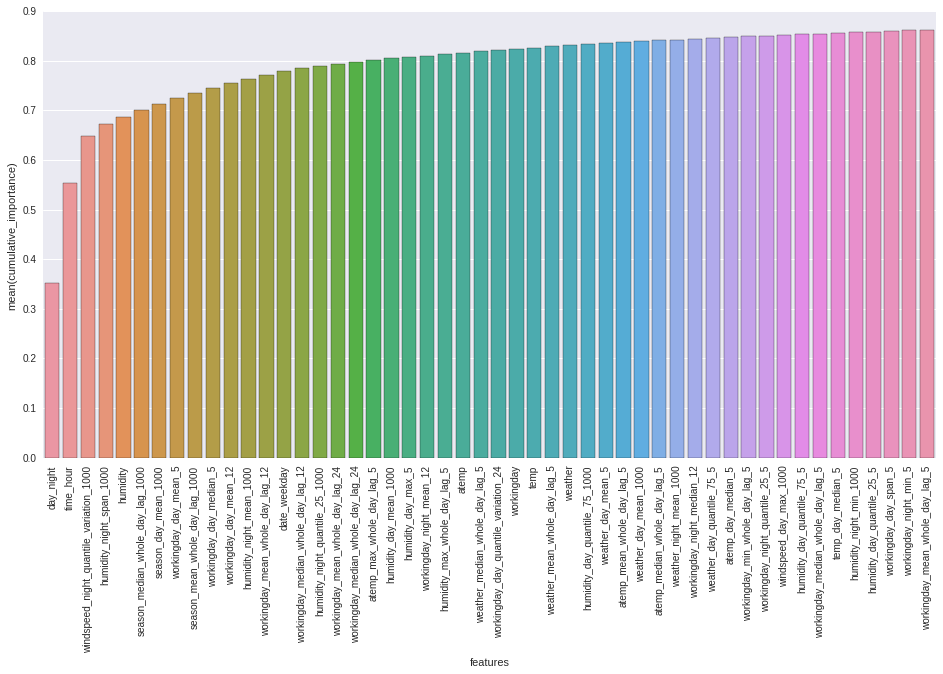

In [27]:
plt.figure(figsize=(16,8))
plt.xticks(rotation=90)
importances = pd.DataFrame(dict(features = X_train.columns.values,
                                importance =rf.feature_importances_)) 
importances = importances.sort_values(["importance"],ascending=False)
importances['cumulative_importance'] = importances.importance.cumsum()
good_features = importances[importances['cumulative_importance'] < 0.9]
print good_features.shape
sns.barplot(x="features", y="cumulative_importance",data=importances[:50])

In [28]:
X_train = X_train[importances["features"].values[:100]]
X_valid = X_valid[importances["features"].values[:100]]

In [58]:
param_dist = {"max_depth": [5,10,15,20,25,30,35],
              "max_features": range(1,90,1),
              "min_samples_split": range(1,3,1),
              "min_samples_leaf": range(1,3,1)
              }

rolling_hyperparams = []
with open(os.path.join("../","models","random_forest_rolling_hyperparams.txt"),"wb") as f:
    for i in range(200):
        print "Iteration:%s\n"%i
        md = choice(param_dist["max_depth"])
        print "max_depth:%s"%md
        mf = choice(param_dist["max_features"])
        print "max_features:%s"%mf
        ms = choice(param_dist["min_samples_split"])
        print "min_samples_split:%s"%ms
        ml = choice(param_dist["min_samples_leaf"])
        print "min_samples_leaf:%s\n"%ml

        rf = RF(n_estimators=200,n_jobs=3,verbose=0,
                max_depth = md,
                max_features=mf,
                min_samples_split=ms,
                min_samples_leaf=ml,
               )
        rf.fit(X_train,Y_train)

        Y_train_pred = rf.predict(X_train)
        Y_valid_pred = rf.predict(X_valid)
        train_error = rmsle(Y_train_pred,Y_train)
        valid_error = rmsle(Y_valid_pred,Y_valid)
        print "Train rmsle:%s"%train_error
        print "Train rmsle:%s\n"%valid_error
        f.write("iteration:%s max_depth:%s max_features:%s min_samples_split:%s "\
        "min_samples_leaf:%s "\
        "train_error:%s valid_error:%s\n"%(i,md,mf,ms,ml,train_error,valid_error))
        
        rolling_hyperparams.append([md,mf,ms,ml,train_error,valid_error])
rolling_hyperparams = rolling_hyperparams.vstack(rolling_hyperparams)
pickle_out(os.path.join("../","models","random_forest_rolling_hyperparams.pkl"),rolling_hyperparams)

Iteration:0

max_depth:25
max_features:55
min_samples_split:1
min_samples_leaf:2

Train rmsle:0.20779504492
Train rmsle:0.435680091474

Iteration:1

max_depth:15
max_features:41
min_samples_split:2
min_samples_leaf:1

Train rmsle:0.21447433956
Train rmsle:0.504227444516

Iteration:2

max_depth:10
max_features:52
min_samples_split:1
min_samples_leaf:2

Train rmsle:0.327120080266
Train rmsle:0.465007933372

Iteration:3

max_depth:20
max_features:60
min_samples_split:2
min_samples_leaf:1

Train rmsle:0.176457363711
Train rmsle:0.441754203467

Iteration:4

max_depth:10
max_features:4
min_samples_split:1
min_samples_leaf:2

Train rmsle:0.90611734449
Train rmsle:1.11315991077

Iteration:5

max_depth:35
max_features:34
min_samples_split:1
min_samples_leaf:1

Train rmsle:0.197133820423
Train rmsle:0.538106048088

Iteration:6

max_depth:20
max_features:71
min_samples_split:2
min_samples_leaf:1

Train rmsle:0.174792164563
Train rmsle:0.42621527896

Iteration:7

max_depth:25
max_features:22
min_s

KeyboardInterrupt: 

In [21]:
steps = [('random_forest', RF(n_estimators=100))]

pipe= Pipeline(steps)

param_dist = {"random_forest__max_depth": [5,10,15,20],
              "random_forest__max_features": sp_randint(1, 6),
              "random_forest__min_samples_split": sp_randint(1, 6),
              "random_forest__min_samples_leaf": sp_randint(1, 6)
              }

rf_cv = RS(pipe, 
           param_distributions=param_dist,
           n_iter=100,           
           cv=5,
           verbose=1,
           n_jobs=3,
          )
rf_cv.fit(X_train, Y_train)

Y_valid_pred = rf_cv.predict(X_valid)
valid_score = rmsle(Y_valid_pred,Y_valid)

Fitting 5 folds for each of 100 candidates, totalling 500 fits


[Parallel(n_jobs=3)]: Done  44 tasks      | elapsed:   23.2s
[Parallel(n_jobs=3)]: Done 194 tasks      | elapsed:  1.8min
[Parallel(n_jobs=3)]: Done 444 tasks      | elapsed:  4.0min
[Parallel(n_jobs=3)]: Done 500 out of 500 | elapsed:  4.6min finished


In [22]:
print rf_cv.best_params_
print valid_score

{'random_forest__min_samples_split': 4, 'random_forest__min_samples_leaf': 4, 'random_forest__max_features': 5, 'random_forest__max_depth': 20}
1.26521033097


In [59]:
number_of_trees = [1,2,3,5,10,50,100,200,300,500,1000]

for nr in number_of_trees:
    rf = RF(n_estimators=nr,
            max_features = 84,
            min_samples_split = 2,
            min_samples_leaf = 2,
            max_depth = 30
           )
    rf.fit(X_train, Y_train)
    Y_valid_pred = rf.predict(X_valid)
    valid_score = rmsle(Y_valid_pred,Y_valid)
    print nr, valid_score

1 0.569882943556
2 0.49749918549
3 0.471800907481
5 0.418729805138
10 0.436402475308
50 0.427771995158
100 0.421221365948
200 0.424080572223
300 0.420015171305
500 0.42291480055


KeyboardInterrupt: 

In [28]:
rf = RF(n_estimators = 1000,
        max_features = 84,
        min_samples_split = 2,
        min_samples_leaf = 2,
        max_depth = 30
       )
rf.fit(X_train,Y_train)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           n_estimators=1000, n_jobs=1, oob_score=False, random_state=None,
           verbose=0, warm_start=False)

In [29]:
Y_valid_pred = rf.predict(X_valid)
valid_score = rmsle(Y_valid_pred,Y_valid)
print valid_score

0.408408380934


In [18]:
model_filepath = os.path.join("../","models","random_forest_rolling.pkl")
pickle_out(model_filepath,rf,compresion_mode=9)
var_names_filepath = os.path.join("../","models","varnames_rolling.pkl")
pickle_out(var_names_filepath,importances["features"].values[:50],compresion_mode=0)